# VencoPy Tutorial 5

This tutorial aims to give a more in depth overview into the flexEstimator class and showcases some features that can be customised.

In [1]:
import pandas as pd

from pathlib import Path
from typing import Union

from vencopy.core.dataparsers import parse_data
from vencopy.core.flexestimators import FlexEstimator
from vencopy.core.flexestimators import GridModeller
from vencopy.utils.utils import create_file_name, write_out,load_configs, create_output_folders

In [2]:

basePath = Path.cwd().parent / 'vencopy'
configDict = load_configs(basePath)
create_output_folders(configs=configDict)

# Adapt relative paths in config for tutorials
configDict['dev_config']['global']['relative_path']['parse_output'] = Path.cwd().parent.parent / configDict['dev_config']['global']['relative_path']['parse_output']
configDict['dev_config']['global']['relative_path']['diary_output'] = Path.cwd().parent.parent / configDict['dev_config']['global']['relative_path']['diary_output']
configDict['dev_config']['global']['relative_path']['grid_output'] = Path.cwd().parent.parent / configDict['dev_config']['global']['relative_path']['grid_output']
configDict['dev_config']['global']['relative_path']['flex_output'] = Path.cwd().parent.parent / configDict['dev_config']['global']['relative_path']['flex_output']
configDict['dev_config']['global']['relative_path']['aggregator_output'] = Path.cwd().parent.parent / configDict['dev_config']['global']['relative_path']['aggregator_output']
configDict['dev_config']['global']['relative_path']['processor_output'] = Path.cwd().parent.parent / configDict['dev_config']['global']['relative_path']['processor_output']

# Set reference dataset
datasetID = 'MiD17'

# Modify the localPathConfig file to point to the .csv file in the sampling folder in the tutorials directory where the dataset for the tutorials lies.
configDict['user_config']['global']['absolute_path'][datasetID] = Path.cwd() /'data_sampling'

# Similarly we modify the datasetID in the global config file
configDict['dev_config']['global']['files'][datasetID]['trips_data_raw'] = datasetID + '.csv'

# We also modify the parseConfig by removing some of the columns that are normally parsed from the MiD, which are not available in our semplified test dataframe
del configDict['dev_config']['dataparsers']['data_variables']['household_id']
del configDict['dev_config']['dataparsers']['data_variables']['person_id']


## FlexEstimator config file

The FlexEstimator config file contains the technical specifications..

In [3]:
configDict['user_config']['flexestimators']

{'filter_fuel_need': False,
 'battery_capacity': 50,
 'electric_consumption': {'general': 18.0,
  'winter_factor': 1.3,
  'spring_factor': 1,
  'summer_factor': 1.03,
  'fall_factor': 1},
 'fuel_consumption': 1.0,
 'start_soc': 0.5,
 'maximum_soc': 0.97,
 'minimum_soc': 0.03,
 'max_iterations': 10,
 'epsilon_battery_level': 0.0001}

## _FlexEstimator_ class

To use the FlexEstimator class, we first need to run the DataParses as well as the GridModeller as they have an argument to the FlexEstimator class.

In [4]:
vpData = parse_data(configs=configDict)
vpData= vpData.process()

grid = GridModeller(configs=configs, activities=data.activities)
grid.assign_grid()


Generic file parsing properties set up.
Starting to retrieve local data file from c:\Users\jagm_li\Documents\vencopy_internal\vencopy\tutorials\data_sampling\MiD17.csv.
Finished loading 2124 rows of raw data of type .csv.
Running in debug mode.
Finished harmonization of variables.
Finished harmonization of ID variables.
Starting filtering, applying 8 filters.
All filters combined yielded that a total of 857 trips are taken into account.
This corresponds to 40.34839924670433 percent of the original data.
Completed park timestamp adjustments.
From 11791.33 km total mileage in the dataset after filtering, 0.0 % were cropped because they corresponded to split-trips from overnight trips.
Finished activity composition with 857 trips and 854 parking activites.
Parsing MiD dataset completed.


Now we can display results on the distance all the trips have

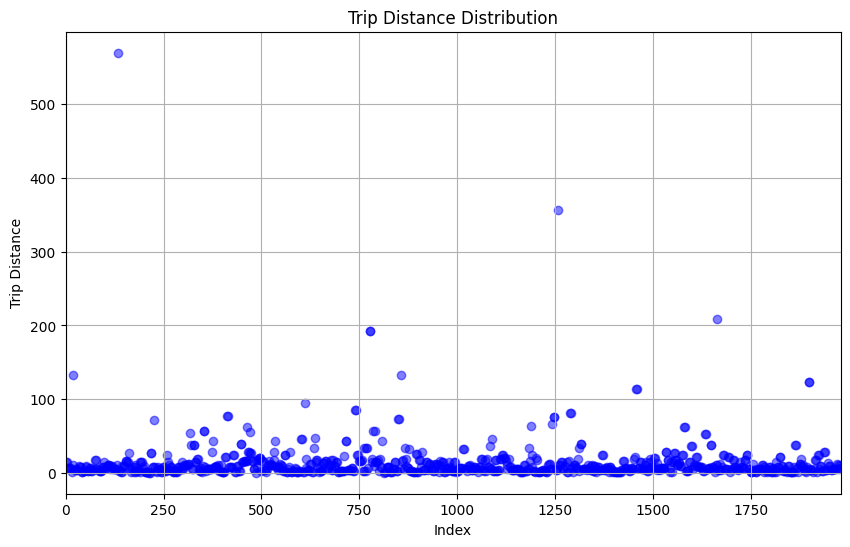

In [5]:
import matplotlib.pyplot as plt

# Filter out rows where trip_distance is not NaN
filtered_df = vpData.dropna(subset=['trip_distance'])

max_index = filtered_df['index'].max()

# Plot trip distances
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df.index, filtered_df['trip_distance'], color='blue', alpha=0.5)
plt.title('Trip Distance Distribution')
plt.xlabel('Index')
plt.ylabel('Trip Distance')
plt.grid(True)
plt.xlim(0, max_index)
plt.show()

In [6]:
# Estimate charging flexibility based on driving profiles and charge connection
vpFlex = FlexEstimator(configs=configDict, activities=vpData)
vpFlex.estimate_technical_flexibility_no_boundary_constraints()


TypeError: unsupported operand type(s) for *: 'float' and 'dict'

In [ ]:
vpEval = Evaluator(configDict=configDict, parseData=pd.Series(data=vpData, index=[datasetID]))
vpEval.plotProfiles(flexEstimator=vpFlex)

To analyse its influence on the demand-side flexibility from EV, we will though charge the assumed size of the battery from 50 kWh to 100 kWh.

In [ ]:
configDict['user_config']['flexestimators']['battery_capacity'] = 100.0

In [ ]:
# Estimate charging flexibility based on driving profiles and charge connection
vpFlex = FlexEstimator(configDict=configDict, datasetID=datasetID, ParseData=vpData)
vpFlex.baseProfileCalculation()
vpFlex.filter()
vpFlex.aggregate()
vpFlex.correct()
vpFlex.normalize()
vpFlex.writeOut()

In [ ]:
vpEval = Evaluator(configDict=configDict, parseData=pd.Series(data=vpData, index=[datasetID]))
vpEval.plotProfiles(flexEstimator=vpFlex)

By doubling the battery capacity we cannot really see from the graphs distinctive changes but we see that, as a result, we have 2 more profiles considered.

## Next Steps

Come back, there will be more upcoming tutorials! :)